# Visualizing Climate Data with Cartopy

<font color='red'><h1>!conda install -c conda-forge cartopy</h1></font>

# Import Matplotlib

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Some Trigonometric Plots

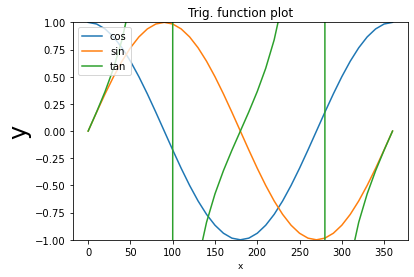

In [64]:
x = np.arange(0, 361, 10)
y = np.cos(np.deg2rad(x))
y1 = np.sin(np.deg2rad(x))
y2 = np.tan(np.deg2rad(x))

plt.figure()
plt.plot(x, y, label='cos')
plt.plot(x, y1, label='sin')
plt.plot(x, y2, label='tan')

plt.ylabel('y', fontsize=24)
plt.xlabel('x', fontsize=9)
plt.title('Trig. function plot')

plt.ylim(-1,1)

plt.legend(loc='upper left')

# Subplot / Panel plot

(-1.0, 1.0)

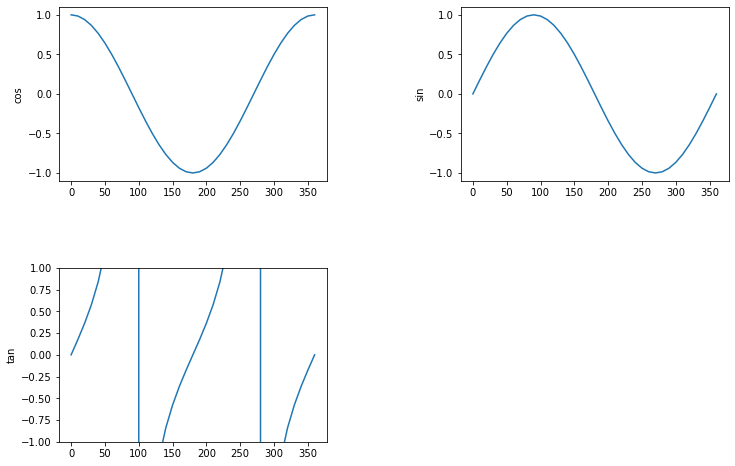

In [82]:
fig = plt.figure( figsize=(12, 8) )
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax = fig.add_subplot(2,2,1)
ax.plot(x, y, label='cos')
ax.set_ylabel('cos')

ax1 = fig.add_subplot(2,2,2)
ax1.plot(x, y1)
ax1.set_ylabel('sin')

ax2 = fig.add_subplot(2,2,3)
ax2.plot(x, y2)
ax2.set_ylabel('tan')
ax2.set_ylim(-1,1)



# 2nd Alternative

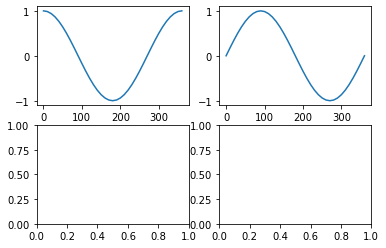

In [88]:
fig, axes = plt.subplots(ncols=2, nrows=2)

axes[0,0].plot(x, y)

axes[0,1].plot(x, y1)

# The Main Task

In [92]:
import xarray as xr

In [93]:
ds_Africa = xr.open_dataset('Africa_cru_data.nc')

In [97]:
da_RR = ds_Africa.pre

In [126]:
Jan_1901_data = da_RR.sel(time='1901-01')

In [98]:
from cartopy import crs, feature

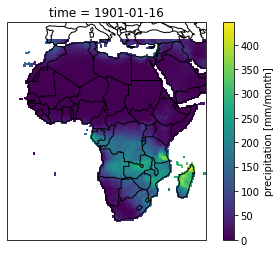

In [128]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection=crs.PlateCarree() )

# Show Global Coastlines
ax1.coastlines()

# Extent for bounding box to clip an area (eg. Africa: 25W, 55E, 35S and 37.5N)
# The list should be arranged as [left/West, right/East, bottom/South and top/North]
ax1.set_extent( [-25, 55, -35, 37.5] )

# Show the country borders
ax1.add_feature( feature.BORDERS)


Jan_1901_data.plot(ax = ax1)


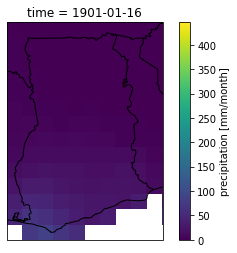

In [134]:
proj = crs.PlateCarree()
fig, axes = plt.subplots(ncols=1, nrows=1, subplot_kw={'projection':proj} )

axes.coastlines()
Jan_1901_data.plot(ax = axes)

axes.set_extent([-3.5, 1.5, 4.5, 11.5])
axes.add_feature(feature.BORDERS)

In [140]:
Jan_clim = da_RR.groupby('time.month').mean('time').sel(month=1)
June_clim = da_RR.groupby('time.month').mean('time').sel(month=6)

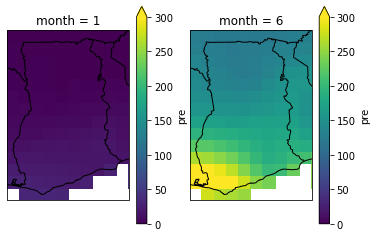

In [144]:
proj = crs.PlateCarree()
fig, axes = plt.subplots(ncols=2, nrows=1, subplot_kw={'projection':proj} )

# January Climatology Plot
ax = axes[0]
ax.coastlines()
Jan_clim.plot(ax = ax, vmax=300)

ax.set_extent([-3.5, 1.5, 4.5, 11.5])
ax.add_feature(feature.BORDERS)


# June Climatology Plot
ax = axes[1]
ax.coastlines()
June_clim.plot(ax = ax, vmax=300)

ax.set_extent([-3.5, 1.5, 4.5, 11.5])
ax.add_feature(feature.BORDERS)

# THE END